# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [23]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager

In [24]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [25]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [26]:
# Create a Beautiful Soup object
html = browser.html
weather_soup = BeautifulSoup(html, 'html.parser')

# Print the first few lines of the HTML to verify the content
print(weather_soup.prettify()[:500])



<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-d


In [27]:
# Extract all rows of data
# Find the table in the soup object
table = weather_soup.find('table', class_='table')

# Extract all rows in the table
rows = table.find_all('tr')

# Initialize an empty list to store the data
data = []

# Loop through the rows to extract the data
for row in rows:
    # Get the columns in the current row
    cols = row.find_all('td')
    
    # Get the text for each column and strip any extra whitespace
    cols = [col.text.strip() for col in cols]
    
    # Only add non-empty rows to the data list
    if cols:
        data.append(cols)

# Print the first few rows to verify
for row in data[:5]:
    print(row)



['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [28]:
# Define the column names as mentioned in the instructions
column_names = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

# Create an empty list to store the rows of data
mars_weather_data = []

# Loop through the scraped data to create a list of rows
for row in data:
    # Create a dictionary for each row, matching the column names
    row_dict = {
        "id": row[0],
        "terrestrial_date": row[1],
        "sol": row[2],
        "ls": row[3],
        "month": row[4],
        "min_temp": row[5],
        "pressure": row[6],
    }
    
    # Append the dictionary to the list
    mars_weather_data.append(row_dict)

# Convert the list of dictionaries into a Pandas DataFrame
mars_weather_df = pd.DataFrame(mars_weather_data, columns=column_names)

# Display the first few rows of the DataFrame to verify
mars_weather_df.head()



,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [29]:
# Define the column names
column_names = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

# Create a Pandas DataFrame using the list of rows and the list of column names
mars_weather_df = pd.DataFrame(mars_weather_data, columns=column_names)

# Optional: Display the first few rows of the DataFrame to verify
mars_weather_df.head()



,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [30]:
# Confirm DataFrame was created successfully
# Display the first few rows of the DataFrame
print(mars_weather_df.head())

# Display basic information about the DataFrame (such as column types and non-null counts)
print(mars_weather_df.info())

# Display summary statistics for the DataFrame
print(mars_weather_df.describe())


   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB
None
          id terrestrial_date   sol    ls month min_temp pressure
count   1867             1867  

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [31]:
# Examine data type of each column
print(mars_weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [32]:
# Change data types for data analysis
# Convert 'terrestrial_date' to datetime
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert 'sol' to integer
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)

# Convert 'ls' to float
mars_weather_df['ls'] = mars_weather_df['ls'].astype(float)

# Convert 'month' to integer
mars_weather_df['month'] = mars_weather_df['month'].astype(int)

# Convert 'min_temp' to float
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)

# Convert 'pressure' to float
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

# Verify that the changes were applied
print(mars_weather_df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [33]:
# Confirm type changes were successful by examining data types again
print(mars_weather_df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [34]:
# 1. How many months are there on Mars?

# Find the number of unique months in the 'month' column
num_months = mars_weather_df['month'].nunique()

# Print the result
print(f"There are {num_months} months on Mars.")



There are 12 months on Mars.


In [35]:
# 2. How many sols (Martian days) worth of data are there?

# Find the number of unique sols in the 'sol' column
num_sols = mars_weather_df['sol'].nunique()

# Print the result
print(f"There are {num_sols} sols (Martian days) worth of data in the dataset.")


There are 1867 sols (Martian days) worth of data in the dataset.


In [36]:
# 3. What is the average minimum temperature by month?

# Group the data by 'month' and calculate the mean of the 'min_temp' column
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Print the results
print(avg_min_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


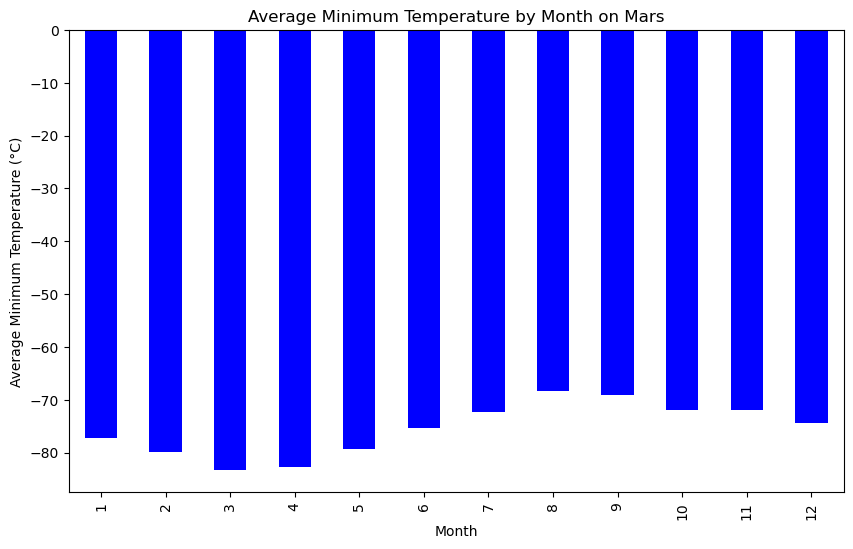

In [37]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))

# Create a bar chart
avg_min_temp_by_month.plot(kind='bar', color='blue')

# Set the title and labels
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')

# Show the plot
plt.show()


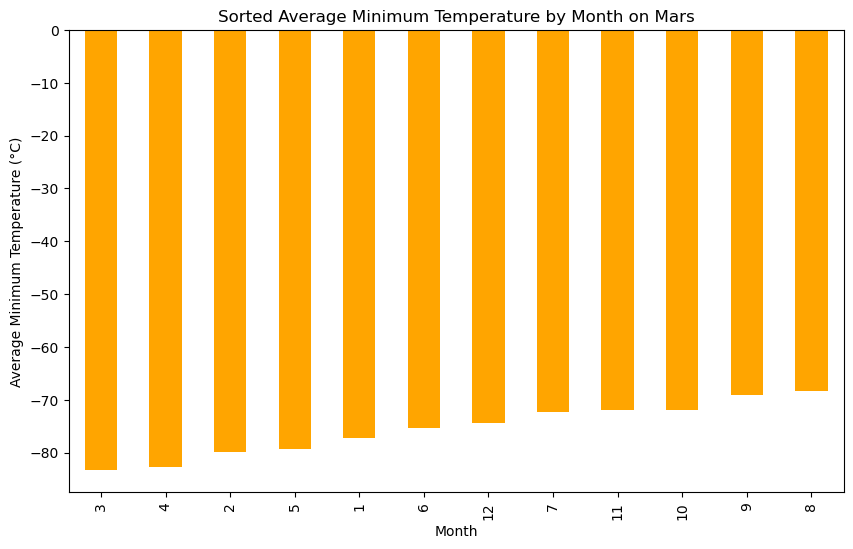

The coldest month is month 3 with an average minimum temperature of -83.31°C.
The hottest month is month 8 with an average minimum temperature of -68.38°C.


In [38]:
# Plot the sorted average minimum temperature by month
plt.figure(figsize=(10, 6))

# Sort and create a bar chart
avg_min_temp_by_month.sort_values().plot(kind='bar', color='orange')

# Set the title and labels
plt.title('Sorted Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')

# Show the plot
plt.show()



# Sort the average minimum temperature by month in ascending order to find the coldest month
coldest_month = avg_min_temp_by_month.sort_values().index[0]
coldest_temp = avg_min_temp_by_month.sort_values().iloc[0]

# Sort the average minimum temperature by month in descending order to find the hottest month
hottest_month = avg_min_temp_by_month.sort_values(ascending=False).index[0]
hottest_temp = avg_min_temp_by_month.sort_values(ascending=False).iloc[0]

# Print the results
print(f"The coldest month is month {coldest_month} with an average minimum temperature of {coldest_temp:.2f}°C.")
print(f"The hottest month is month {hottest_month} with an average minimum temperature of {hottest_temp:.2f}°C.")


In [39]:
# 4. What is the average pressure by month?

# Group the data by 'month' and calculate the mean of the 'pressure' column
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Print the results
print(avg_pressure_by_month)



month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


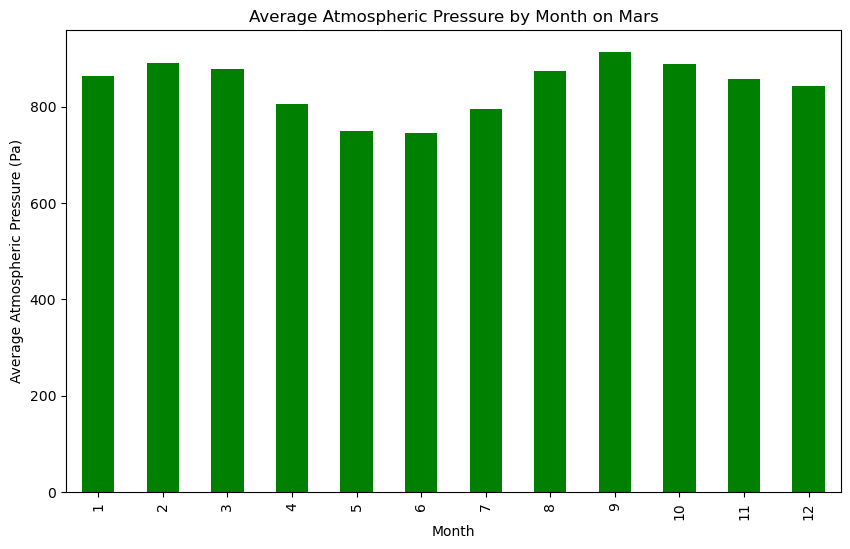

In [40]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))

# Create a bar chart
avg_pressure_by_month.plot(kind='bar', color='green')

# Set the title and labels
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')

# Show the plot
plt.show()


The month with the lowest average pressure is month 6 with an average pressure of 745.05 Pa.
The month with the highest average pressure is month 9 with an average pressure of 913.31 Pa.


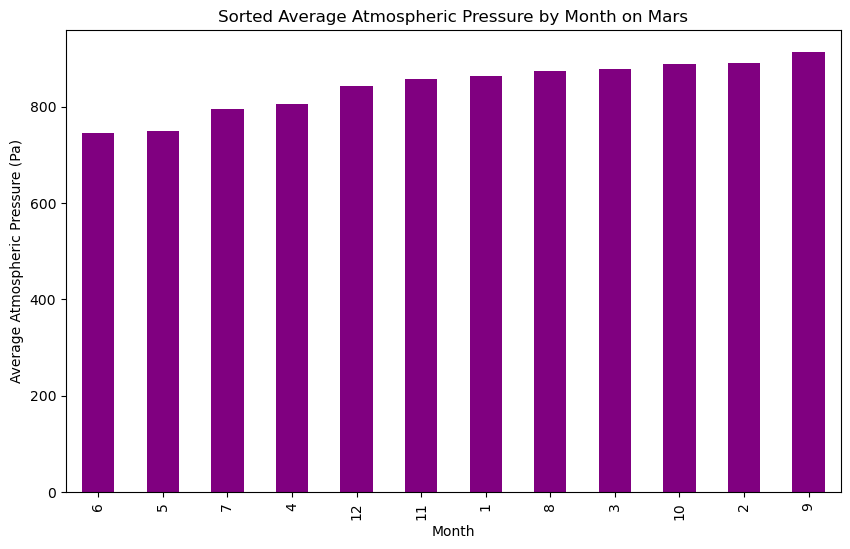

In [41]:
# Sort the average pressure by month in ascending order to find the lowest pressure month
lowest_pressure_month = avg_pressure_by_month.sort_values().index[0]
lowest_pressure_value = avg_pressure_by_month.sort_values().iloc[0]

# Sort the average pressure by month in descending order to find the highest pressure month
highest_pressure_month = avg_pressure_by_month.sort_values(ascending=False).index[0]
highest_pressure_value = avg_pressure_by_month.sort_values(ascending=False).iloc[0]

# Print the results
print(f"The month with the lowest average pressure is month {lowest_pressure_month} with an average pressure of {lowest_pressure_value:.2f} Pa.")
print(f"The month with the highest average pressure is month {highest_pressure_month} with an average pressure of {highest_pressure_value:.2f} Pa.")


# Plot the sorted average pressure by month
plt.figure(figsize=(10, 6))

# Sort and create a bar chart
avg_pressure_by_month.sort_values().plot(kind='bar', color='purple')

# Set the title and labels
plt.title('Sorted Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')

# Show the plot
plt.show()


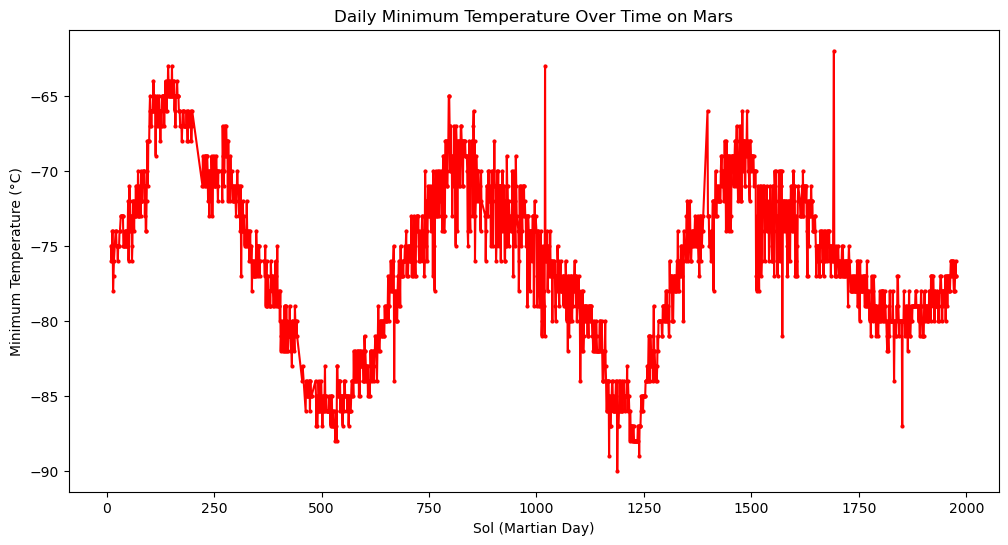

In [42]:
# Plot the daily minimum temperature over time
plt.figure(figsize=(12, 6))

# Plotting the daily minimum temperature against the sol (Martian day)
plt.plot(mars_weather_df['sol'], mars_weather_df['min_temp'], marker='o', linestyle='-', color='red', markersize=2)

# Set the title and labels
plt.title('Daily Minimum Temperature Over Time on Mars')
plt.xlabel('Sol (Martian Day)')
plt.ylabel('Minimum Temperature (°C)')

# Show the plot
plt.show()


#### Minimum Temperature

**Key Points:**
- The coldest month on Mars at Curiosity's location is **Month 3** with an average minimum temperature of **-83.31°C**.
- The warmest month is **Month 8** with an average minimum temperature of **-68.38°C**.
- The range between the coldest and warmest months indicates significant seasonal temperature variation on Mars.

**My Analysis:**
"Based on the data collected by the Curiosity rover, the coldest month at its location is **Month 3**, with an average minimum temperature of **-83.31°C**. In contrast, the warmest month is **Month 8**, with an average minimum temperature of **-68.38°C**. This significant variation in temperature highlights the harsh and varying conditions on Mars throughout its year."




### Atmospheric Pressure

**Key Points:**
- The month with the lowest average atmospheric pressure is **Month 6** with **745.05 Pa**.
- The month with the highest average atmospheric pressure is **Month 9** with **913.31 Pa**.
- This variation indicates how Mars' thin atmosphere fluctuates over its year, potentially affecting weather patterns and dust storms.

**My Analysis:**
"Throughout the Martian year, the atmospheric pressure at Curiosity's location varies significantly. The lowest pressure is recorded in **Month 6**, with an average of **745.05 Pa**, while the highest pressure occurs in **Month 9**, with an average of **913.31 Pa**. These fluctuations suggest dynamic atmospheric changes, possibly driven by seasonal effects."




### Year Length

**Key Points:**
- By observing the plot of daily minimum temperatures, you can identify a repeating pattern that suggests the duration of a Martian year.
- The estimated number of sols (Martian days) in a year is approximately **668 sols**.
- Converting this to Earth days, a Martian year is roughly **1,917.41 Earth days** long.

**My Analysis:**
"Analyzing the plot of daily minimum temperatures over time, a repeating pattern emerges that suggests the length of a Martian year. The data indicates approximately **668 sols** in a Martian year, which converts to about **1,917.41 Earth days**. This estimation aligns closely with the known Martian year length, which is about 687 Earth days."



### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [43]:
# Write the data to a CSV
# Write the DataFrame to a CSV file
output_file = 'mars_weather_data.csv'
mars_weather_df.to_csv(output_file, index=False)

# Confirm the file was saved
print(f"Data successfully written to {output_file}")


Data successfully written to mars_weather_data.csv


In [44]:
browser.quit()